# 1-1. 라이브러리 불러오기

In [ ]:
# 라이브러리가 없다면, 여기서 라이브러리를 임포트 하세요.
# 다른 셀 에서는 라이브러리를 임포트 하지 않습니다.
# 다른 라이브러리가 필요하면 여기에 전부 넣으세요.
import matplotlib.pyplot as plt # 그래프 그리기용
import pandas as pd # 판다스, 데이터 프레임
import numpy as np # 넘파이, 수학 관련
import tensorflow as tf

# 파이토치...
from sklearn.metrics import accuracy_score, precision_score, recall_score
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset # 데이터셋
from torch.utils.data import DataLoader # 데이터로더

# 1-2. 파일 불러오기 (다른 방식도 포함)

In [ ]:
# 파일은 수동으로 불러오시오. 왜? 보안때문에...
# 코칭의 요청으로 데이터 파일(csv)는 제공되지 않습니다.
# 참고로, 25개의 파일을 업로드 하는 시간이 2분이나 되기 때문입니다.
# 다른 파일만 따로 업로드 하는 방식을 사용하는것을 추천합니다.
# 직관적으로 실행 구조를 이해하기 위해 프린트문을 추가하였습니다.

# 경고: 이 소스코드를 사용하지 마시고
# 코랩 파일목록에서 오른쪽 마우스 클릭을 눌러서 업로드 버튼을 선택한 후
# 파일을 업로드 해 주세요.
# uploaded 함수는 진행 속도가 매우 느립니다.
# from google.colab import files
# print('abnormal 파일을 업로드 해 주세요.')
# uploaded = files.upload()
# print('normal 파일을 업로드 해 주세요.')
# uploaded = files.upload()
# print('업로드 완료')

In [ ]:
# 이것은 새로 추가된 코드입니다.
# 1-3 부분의 추가 csv 파일 생성 부분에서 만들어진 csv 파일을 업로드 후 사용하세요.
# 참고로 업로드는 수동으로 하세요.
# 왼쪽에 파일 목록 표시되는것에 오른쪽 마우스 클릭하면 업로드 메뉴가 있습니다.
# 업로드 메뉴를 누르면 업로드할 파일을 선택할 수 있습니다.
normal_data = pd.read_csv('normal_data.csv')
abnormal_data = pd.read_csv('abnormal_data.csv')

# 다만, 이렇게 업로드를 하면, 넘파이로 변환을 해야 하므로 다음 작업도 추가합니다.
normal_data = normal_data.to_numpy()
abnormal_data = abnormal_data.to_numpy()

# 1-3. 데이터를 변수에 넣기

In [ ]:
# 데이터를 변수에 집어넣자
# csv 파일을 읽어서 데이터프레임에 넣습니다.
# 참고로 이 코드는 한개의 파일만 읽을 수 있습니다.
# file_data = pd.read_csv('No1_2in20210503_N_1.csv', encoding='cp949')

In [ ]:
# 다중 파일을 1개의 변수에 집어넣기
# 이것은 다양한 방법이 있습니다. 현희님은 concat을 사용하였고, 저는 append를 사용했습니다.
multy_file_data = pd.DataFrame()
for i in range(1, 20 + 1): # 범위는 1 이상, 21 미만(마지막값에 1을 더해야 마지막값까지 루프한다.)
  file_data = pd.read_csv(f'No1_2in20210503_N_{i}.csv', encoding='cp949')
  # 그런데, 단순히 append 함수를 사용하는것은 내부 변수의 내용을 변경하지 않습니다.
  # append 한 결과를 원본 변수에 대입해서 갱신시켜야 합니다.
  multy_file_data = multy_file_data.append(file_data)

# 멀티파일 데이터의 최종 결과롤 normal 데이터에 복사합니다.
normal_dataframe = multy_file_data.copy()

# abnormal 파일도 같은 방식으로 사용합니다.
multy_file_data = pd.DataFrame()
for i in range(1, 5 + 1): # 범위는 1 이상, 6 미만(마지막값에 1을 더해야 마지막값까지 루프한다.)
  file_data = pd.read_csv(f'No1_2in20210708-1_AZPid_20_30s_{i}.csv', encoding='cp949')
  # 그런데, 단순히 append 함수를 사용하는것은 내부 변수의 내용을 변경하지 않습니다.
  # append 한 결과를 원본 변수에 대입해서 갱신시켜야 합니다.
  multy_file_data = multy_file_data.append(file_data)

# 멀티파일 데이터의 최종 결과롤 abnormal 데이터에 복사합니다.
abnormal_dataframe = multy_file_data.copy()

In [ ]:
abnormal_dataframe

NameError: ignored

In [ ]:
# 이제 데이터프레임에 있는 모든 데이터들 중 학습에 필요한 'PosCmd, PosFdb' 부분만 남깁니다.
# 새로운 데이터 프레임을 만들어서 'PosCmd, PosFdb'만 있는 데이터 프레임을 만들었습니다.
normal_data = pd.DataFrame(normal_dataframe, columns=['PosCmd [mA]', 'PosFdb [mA]'])
abnormal_data = pd.DataFrame(abnormal_dataframe, columns=['PosCmd [mA]', 'PosFdb [mA]'])

# 데이터프레임을 넘파이로 변환하기 이전에, 데이터프레임에서 csv파일을 저장합니다.
# 그 이유는 넘파이로 저장하는건 소스코드가 복잡하고 귀찮습니다.
normal_data.to_csv('normal_data.csv', index = False)
abnormal_data.to_csv('abnormal_data.csv', index = False)

# 그리고 이 데이터를 numpy로 변환합니다.
# 파이토치는 데이터프레임을 처리할 수 없기 때문에 numpy 형태로 데이터를 변환해야 합니다.
normal_data = normal_data.to_numpy()
abnormal_data = abnormal_data.to_numpy()

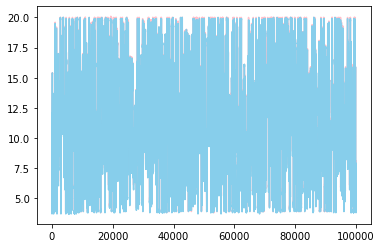

In [ ]:
# 간단한 그래프 출력
# 데이터가 넘파이형태로 변환되어서 행, 열로 인덱싱해서 그래프를 출력해야 합니다.
# [:, 0] 은 2차원 배열의 모든 첫번째 값, [:, 1]은 2차원 배열의 모든 두번째 값을 순서대로 출력합니다.
# 따로 x축의 내용을 지정하진 않았기 때문에 배열의 인덱스를 기준으로 x값이 출력됩니다.
plt.plot(normal_data[:, 0], color='pink')
plt.plot(normal_data[:, 1], color='skyblue')

# ?: 임시공간

True

# 2-1. 행렬의 형태 변환

In [ ]:
# 원본 데이터셋의 행렬 크기는 100000x2 입니다.
# 그런데, 학습데이터를 만들기 위해서는 ?x60의 배열이 필요합니다.
# 그 이유는 학습 클래스 인코더의 첫번째 레이어의 차원 수가 60이기 때문입니다.
# 따라서 이 형태에 맞게 행렬을 변형하겠습니다.

# 그런데 100000은 60으로 나눌 수 없습니다. 왜냐하면, 100000 / 60 = 1666.67 이 되기 때문에
# 행렬의 형태로 변환이 불가능합니다.
# 따라서, 배열의 총 개수를 변경할 필요가 있습니다. 60으로 나눌 수 있게 해야 합니다.
# 그래서 배열의 길이를 99990 으로 변경한 다음에, 60으로 나누도록 설정했습니다.
# 참고로 배열 길이에 -1 을 사용하면, 나머지 길이를 알아서 결정해줍니다. 편리한 기능입니다.
# 그러나, 가급적이면 -1 보다는 명시적으로 사용하는것을 추천합니다.

In [ ]:
# 해당 배열의 길이를 100000에서 99990으로 변경합니다.
edit_normal_data = normal_data[0:99960]

# 그 다음, 배열의 형태를 (-1, 30, 2) 형태로 변환합니다.
# reshape, view 방식 중 아무거나 사용해도 됩니다.(큰 차이는 없을듯...)
# 이 상태에서 edit_normal_data 의 shape 는 (3330, 60) 이 됩니다.
edit_normal_data = edit_normal_data.reshape(-1, 30, 2)

# 참고사항
# 입력 배열 형태: (-1, 30, 2)
# 인코딩 클래스 내부에서 인코딩 직전에: (-1, 60)
# 인코딩 리니어: input 60, output free
# 디코딩 리니어: input free, output 60
# 출력 배열 형태: 입력 배열 형태랑 동일 (-1, 30, 2)



# 이 배열은 원래대로 되돌리는 것이 가능합니다.
# reshape(-1, 2) 로 하거나 (99990, 2) 로 변환하면 원본데이터가 됩니다.
# 이 것은 나중에 사용할 예정입니다.
# 참고로, numpy의 값들이 서로 같은지 비교할때는 np.array_equal() 를 사용해주세요.
# 단순히 == 연산자를 사용하면 list끼리만 비교되어서 넘파이의 모든 값들이 True, False로 출력됩니다.

# ? 임시공간

In [ ]:
test = torch.tensor(edit_normal_data)
test2 = test.view(-1, 60)
test2.shape

torch.Size([3332, 60])

In [ ]:
edit_normal_data.shape

(3332, 30, 2)

# 2-2. 데이터셋, 데이터로더



In [ ]:
# 파이토치는 데이터셋이라는 개념이 있습니다.
# 인공지능 학습 데이터를 데이터셋과 분리하기 위해 사용합니다.
# 임포트문은 라이브러리 불러오기에 전부 넣었으므로 그 부분을 참고하세요.

# 기본적으로, 커스텀 데이터셋을 만드려면 3개의 함수를 구현해야 합니다.
# __init__(self): 객체가 생성될 때 한번만 실행한다.(초기화 함수)
# __len__(self): 데이터셋의 샘플 개수,
# __getitem(self, idx): 인덱스 idx 에 해당하는 데이터셋 샘플을 리턴

In [ ]:
# 커스텀 데이터셋은 torch.utils.data.Dataset 객체를 상속받습니다.
# 여기서는 from import를 했기 때문에 Dataset으로 사용할 수 있습니다.
class MiraeDataset(Dataset):
  """
  생성자에는 데이터셋으로 사용할 데이터를 넣어주세요.
  기본값: edit_normal_data (수정된 노멀 데이터)
  소스 코드 실행 순서 실수 방지를 위해 변수명을 변경하였습니다.
  normal_data 를 불러온 후에 edit_normal_data 변수를 실행시켜주세요.
  """
  def __init__(self, input_data=test2):
    


    # 코칭님의 데이터 전처리 요청에 따라 다음과 같이 데이터 전처리를 합니다.
    # 공식: (origenalValue - 4) / 16
    self.train_data = (input_data - 4) / 16

  def __len__(self):
    return len(self.train_data)

  def __getitem__(self, idx):
    return self.train_data[idx]

# 데이터셋을 완성했으므로 객체를 생성합니다.
mirae_data_set = MiraeDataset()

In [ ]:
len(mirae_data_set)

3332

In [ ]:
# 데이터셋이 완성되면 데이터로더를 이용해 순회 가능한 객체로 감쌀 수 있습니다.
# 데이터셋은 mirae_data_set 이고 배치사이즈는 255입니다.
# 참고로 데이터로더에는 셔플 옵션이 있지만, 무시하겠습니다.
mirae_data_loader = DataLoader(mirae_data_set, 255)

In [ ]:
len(mirae_data_loader)

14

# 2-3. 오토인코더 클래스

In [ ]:
class MiraeAutoEncoder(nn.Module):
  def __init__(self):
    super().__init__()

    # 인코더는 순차 레이어로 표현했습니다.
    # 60 -> 30 -> 15 -> 8
    self.encoder = nn.Sequential(
      nn.Linear(60, 30),
      nn.Linear(30, 15),
      nn.Linear(15, 8)
    )
    
    # 디코더는 인코딩의 반대 과정을 거칩니다.
    self.decoder = nn.Sequential(
      nn.Linear(8, 15),
      nn.Linear(15, 30),
      nn.Linear(30, 60),
      nn.Sigmoid()
    )

  def forward(self, x):
    x = torch.tensor(x) # 이것은 x 값을 텐서로 변환하기 위한 함수입니다.
    x = x.float() # float 사용하라는 문제때문에 float으로 강제로 형변환
    x = x.reshape(-1, 60)
    encodeData = self.encoder(x) # x 값을 인코딩 합니다.
    decodeData = self.decoder(encodeData) # 인코드데이터를 디코딩합니다.
    return decodeData # 디코딩한 결과를 리턴합니다.

mirae_auto_encoder = MiraeAutoEncoder()

In [ ]:
print(mirae_auto_encoder)

MiraeAutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=60, out_features=30, bias=True)
    (1): Linear(in_features=30, out_features=15, bias=True)
    (2): Linear(in_features=15, out_features=8, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=8, out_features=15, bias=True)
    (1): Linear(in_features=15, out_features=30, bias=True)
    (2): Linear(in_features=30, out_features=60, bias=True)
    (3): Sigmoid()
  )
)


# 2-4. 손실 함수, 옵티마이저 설정

In [ ]:
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(mirae_auto_encoder.parameters(), 0.001)

# 손실함수는 그냥 아무거나 막 넣었습니다.
# 그런데 모든 손실함수를 막 사용할 수 있는건 아닙니다.
# CrossEntropy를 사용했을 때 1D 텐서가 아니라 연산이 불가능했습니다.
# 그래서 MSELoss로 변경하였습니다.
# 옵티마이저는 Adam으로 설정했습니다.

# 3-1. train 함수

In [ ]:
# 코드 요약본
number_of_epoch = 20
for i in range(number_of_epoch):
  for j, data in enumerate(mirae_data_loader):
    # 여기서 j는 index 이고, data는 데이터입니다.
    train_result = mirae_auto_encoder(data) # 오토인코더로 학습한 데이터를 변수로 받아옵니다.
    data = data.float() # loss를 계산할 때 dtype이 double형이라는 오류 때문에 강제로 float으로 형변환

    # 한번 데이터를 처리할 때마다 해당하는 과정을 거칩니다.
    optimizer.zero_grad() # 가중치 초기화
    loss = loss_function(train_result, data) # 손실값 계산
    loss.backward() # 모든 가중치 계산 및 미분
    optimizer.step() # 저장된 매개변수 값을 이용해 매개변수 업데이트

  # 1 에폭이 끝나면 손실 값을 출력합니다.
  print(loss)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


tensor(0.1751, grad_fn=<MseLossBackward>)
tensor(0.1751, grad_fn=<MseLossBackward>)
tensor(0.1751, grad_fn=<MseLossBackward>)
tensor(0.1751, grad_fn=<MseLossBackward>)
tensor(0.1751, grad_fn=<MseLossBackward>)
tensor(0.1751, grad_fn=<MseLossBackward>)
tensor(0.1751, grad_fn=<MseLossBackward>)
tensor(0.1751, grad_fn=<MseLossBackward>)
tensor(0.1751, grad_fn=<MseLossBackward>)
tensor(0.1751, grad_fn=<MseLossBackward>)
tensor(0.1751, grad_fn=<MseLossBackward>)
tensor(0.1751, grad_fn=<MseLossBackward>)
tensor(0.1751, grad_fn=<MseLossBackward>)
tensor(0.1751, grad_fn=<MseLossBackward>)
tensor(0.1751, grad_fn=<MseLossBackward>)
tensor(0.1751, grad_fn=<MseLossBackward>)
tensor(0.1751, grad_fn=<MseLossBackward>)
tensor(0.1751, grad_fn=<MseLossBackward>)
tensor(0.1751, grad_fn=<MseLossBackward>)
tensor(0.1751, grad_fn=<MseLossBackward>)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


epoch: 1 graph number:  0 / 14


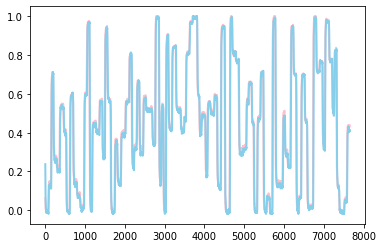

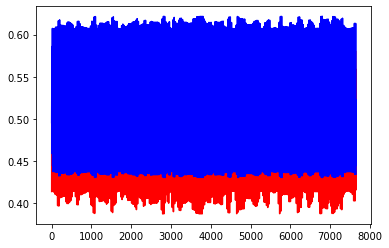

average loss:  tensor(-0.0628) ,loss : tensor(0.0986, grad_fn=<MseLossBackward>)
epoch: 1 graph number:  1 / 14


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


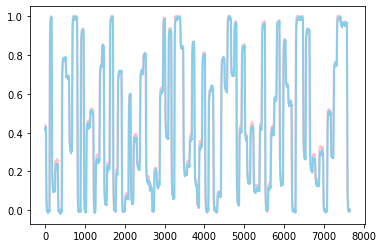

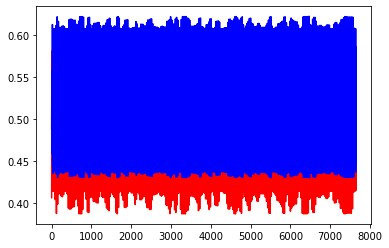

average loss:  tensor(-0.0529) ,loss : tensor(0.1237, grad_fn=<MseLossBackward>)
epoch: 1 graph number:  2 / 14


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


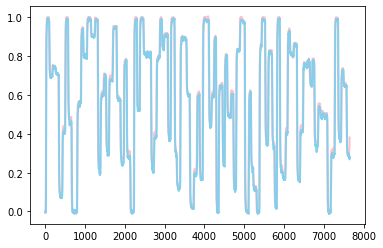

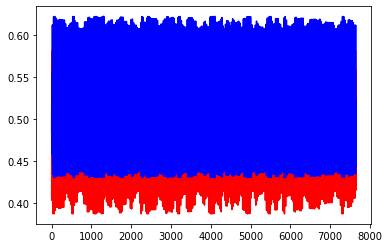

average loss:  tensor(0.0653) ,loss : tensor(0.1049, grad_fn=<MseLossBackward>)
epoch: 1 graph number:  3 / 14


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


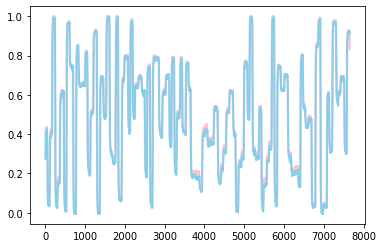

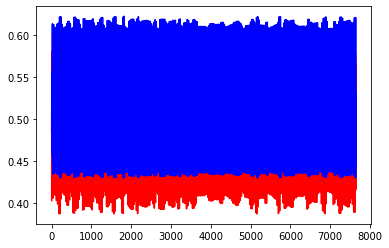

average loss:  tensor(-0.0202) ,loss : tensor(0.0795, grad_fn=<MseLossBackward>)
epoch: 1 graph number:  4 / 14


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


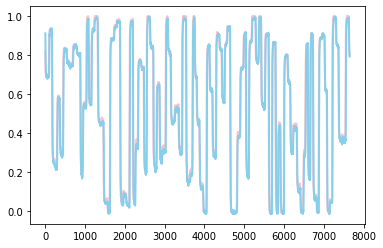

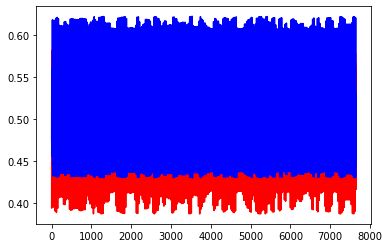

average loss:  tensor(0.0367) ,loss : tensor(0.1153, grad_fn=<MseLossBackward>)
tensor(0.1153, grad_fn=<MseLossBackward>)


In [ ]:
# 여기서 어떻게 해야 할까....
# 소스를 검색해보니, for i in range(number_of_epoch) 이 핵심이고,
# 이 1회 에폭에 또다시 for문이 들어가며,
# 두번째 내부 for문은 for j, value in enumerate(train_loader) 형태가 됩니다.
loopCount = 0 # 디버그용도
number_of_epoch = 1 # 반복할 에폭 수
# batch_size = 44 # 배치 사이즈 (데이터로더에 정의되어있어서 생략하겠습니다.)
for i in range(number_of_epoch):
  for j, data in enumerate(mirae_data_loader):
    # 여기서 j는 index 이고, data는 데이터입니다.
    train_result = mirae_auto_encoder(data) # 오토인코더로 학습한 데이터를 변수로 받아옵니다.

    # print('data shape:', data.shape)
    # print('study_data shape:', study_data.shape)
    data = data.float() # loss를 계산할 때 dtype이 double형이라는 오류 때문에 강제로 float으로 형변환

    # 이 구문은 파이토치에서 학습을 할 때 손실을 계산하는 코드 패턴입니다.
    # 왜 이렇게 되는지 원리는 모릅니다.
    # 다만, 대다수가 이런 형태로 사용합니다.
    optimizer.zero_grad()
    loss = loss_function(train_result, data)
    loss.backward()
    optimizer.step()
    # 이게 한 과정이 끝나고...

    # 배열을 다시 원래 형태로 복원
    data = data.reshape(-1, 2)
    train_result = train_result.reshape(-1, 2)

    # 디버그용 그래프 출력
    print('epoch:',number_of_epoch, 'graph number: ', j, '/', len(mirae_data_loader))
    # print(data)
    plt.plot(data[:, 0], color='pink', linewidth=2)
    plt.plot(data[:, 1], color='skyblue', linewidth=2)
    plt.show()
    train_result = train_result.detach().numpy()
    # # print(train_result)
    plt.plot(train_result[:, 0], color='red')
    plt.plot(train_result[:, 1], color='blue')
    plt.show()

    different_value = data - train_result
    # plt.bar(data[:, 1], train_result[:, 1], color='black')
    # plt.show()

    # plt.plot(different_value[:, 0], color='silver')
    # plt.plot(different_value[:, 1], color='orange')
    # plt.show()
    print('average loss: ', different_value.mean(),',loss :', loss)

    loopCount += 1
    if(loopCount >= 5):
      break

  # 1 에폭이 끝날 때마다 loss 계산을 합니다.
  # 그런데, loss 값을 출력을 하면 텐서를 출력합니다.
  # 다른 소스를 살펴보았는데, loss.data, loss.item 과 같은형태로 사용하는것으로 보아서는
  # loss 원본이 텐서 형태인것으로 보입니다.
  print(loss)

In [ ]:
threshold = np.mean(loss) + np.std(loss)

In [ ]:
threshold = 0.01
reconstructions = MiraeDataset(train_result)
loss = tf.keras.losses.mae(reconstructions, train_result)
preds = tf.math.less(loss, threshold)

print("Accuracy:", accuracy_score(test_labels, preds)) 
print("Precision:", precision_score(test_labels, preds)) # ()
print("Recall:", recall_score(test_labels, preds)) # TP/(TP+FN)

NameError: ignored

In [ ]:
data

tensor([[0.8188, 0.9125],
        [0.7812, 0.9062],
        [0.7625, 0.8938],
        ...,
        [0.8000, 0.8062],
        [0.8000, 0.8000],
        [0.8000, 0.7937]])

In [ ]:
train_result

array([[0.394539  , 0.4757409 ],
       [0.5639935 , 0.504015  ],
       [0.46372664, 0.52533805],
       ...,
       [0.51413786, 0.52933884],
       [0.5115519 , 0.4921852 ],
       [0.51524454, 0.43166962]], dtype=float32)

In [ ]:
mirae_auto_encoder(abnormal_data)

RuntimeError: ignored

In [ ]:
abnormal_data.shape

(25000, 2)

In [ ]:
train_result.shape

(40, 2)